# 1- Data Tidying:
## **Part I**
### **Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.


#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.

In [101]:
import pandas as pd
df = pd.read_csv('tb-raw.csv')

# Unpivot the DataFrame
# Unpivot means to turn columns into rows
# id_vars are the columns that will remain the same
# var_name is the name of the new column that will hold the old column names
# value_name is the name of the new column that will hold the old column values
# In this case, the columns 'country' and 'year' will remain the same
df_melted = pd.melt(df, id_vars=['country', 'year'], var_name='sex_age', value_name='cases')
df_melted.head()


,country,year,sex_age,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


In [102]:
# Extract 'sex' and 'age_group' from the 'sex_age' column
# str[0] gets the first character of the string
# str[1:] gets the string starting from the second character
df_melted['sex'] = df_melted['sex_age'].str[0]
df_melted['age_group'] = df_melted['sex_age'].str[1:]

# Drop the 'sex_age' column as it's no longer needed
df_melted.drop(columns='sex_age', inplace=True)

# Display the first few rows of the updated dataframe
df_melted.head()

,country,year,cases,sex,age_group
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014


In [103]:
# Remove rows with NaNs in the 'cases' column
df_cleaned = df_melted.dropna(subset=['cases'])

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

,country,year,cases,sex,age_group
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014


## **Part II**

Observe the following dataset: ./CSVs/salesMinimized.csv 
Please observe columns thoroughly as you need to apply some common-sense to represent the columns correctly.

#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.


In [104]:
df_sales = pd.read_csv('salesMinimized.csv')

# Drop the 'Unnamed: 0' column from the DataFrame
df_sales = df_sales.drop(columns=['Unnamed: 0'])

# Display the first few rows of the dataframe to verify the change
df_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# Unpivot the DataFrame
# id_vars are the columns that will remain the same
# var_name is the name of the new column that will hold the old column names
# value_name is the name of the new column that will hold the old column values
df_sales_melted = pd.melt(df_sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                          var_name='day', value_name='sales')

# Display the first few rows of the melted dataframe
df_sales_melted.head()


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [106]:
# Convert 'day' column to represent the actual day number
df_sales_melted['day'] = df_sales_melted['day'].astype(str).str.extract('(\\d+)').astype(int)

# Display the first few rows of the updated dataframe
df_sales_melted.head()


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1,0


## PART III
Using Boston House pricing dataset, apply outlier detection techniques discussed in class to detect outliers. Use different techniques and comment your code. <br>
You need to check how to load the dataset correctly! <br>
1. You should include some Visualization techniques
2. You should include some statistical approaches
3. You should analyze your attributes using Univariant and multivariant outlier detection techniques.
4. Choose one or more of your outlier detection techniques and remove outliers

In [107]:
import requests
import numpy as np


# Load the dataset from the URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
response = requests.get(data_url)

# Check if the request was successful
if response.status_code == 200:
    with open("boston_data.txt", "w") as file:
        file.write(response.text)
    print("Page downloaded and saved to boston_data.txt")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Load the data from the file using pandas
data_df = pd.read_csv("boston_data.txt", sep="\\s+", skiprows=22, header=None)

# Display the first few rows of the DataFrame
data_df.head()

# Process the data into a proper DataFrame
# The dataset is organized such that features and targets are in separate lines
# data_df.values[::2, :] gets the values for the features
# data_df.values[1::2, :2] gets the values for the target
# np.hstack combines the features and target into a single array
data = np.hstack([data_df.values[::2, :], data_df.values[1::2, :2]])

# data_df.values[1::2, 2] gets the target values from the second column
target = data_df.values[1::2, 2]

# Combine the features and target into a single DataFrame
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
data_df = pd.DataFrame(data, columns=columns)
data_df['MEDV'] = target

# Display the Dataframe 
data_df.head()

Page downloaded and saved to boston_data.txt


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


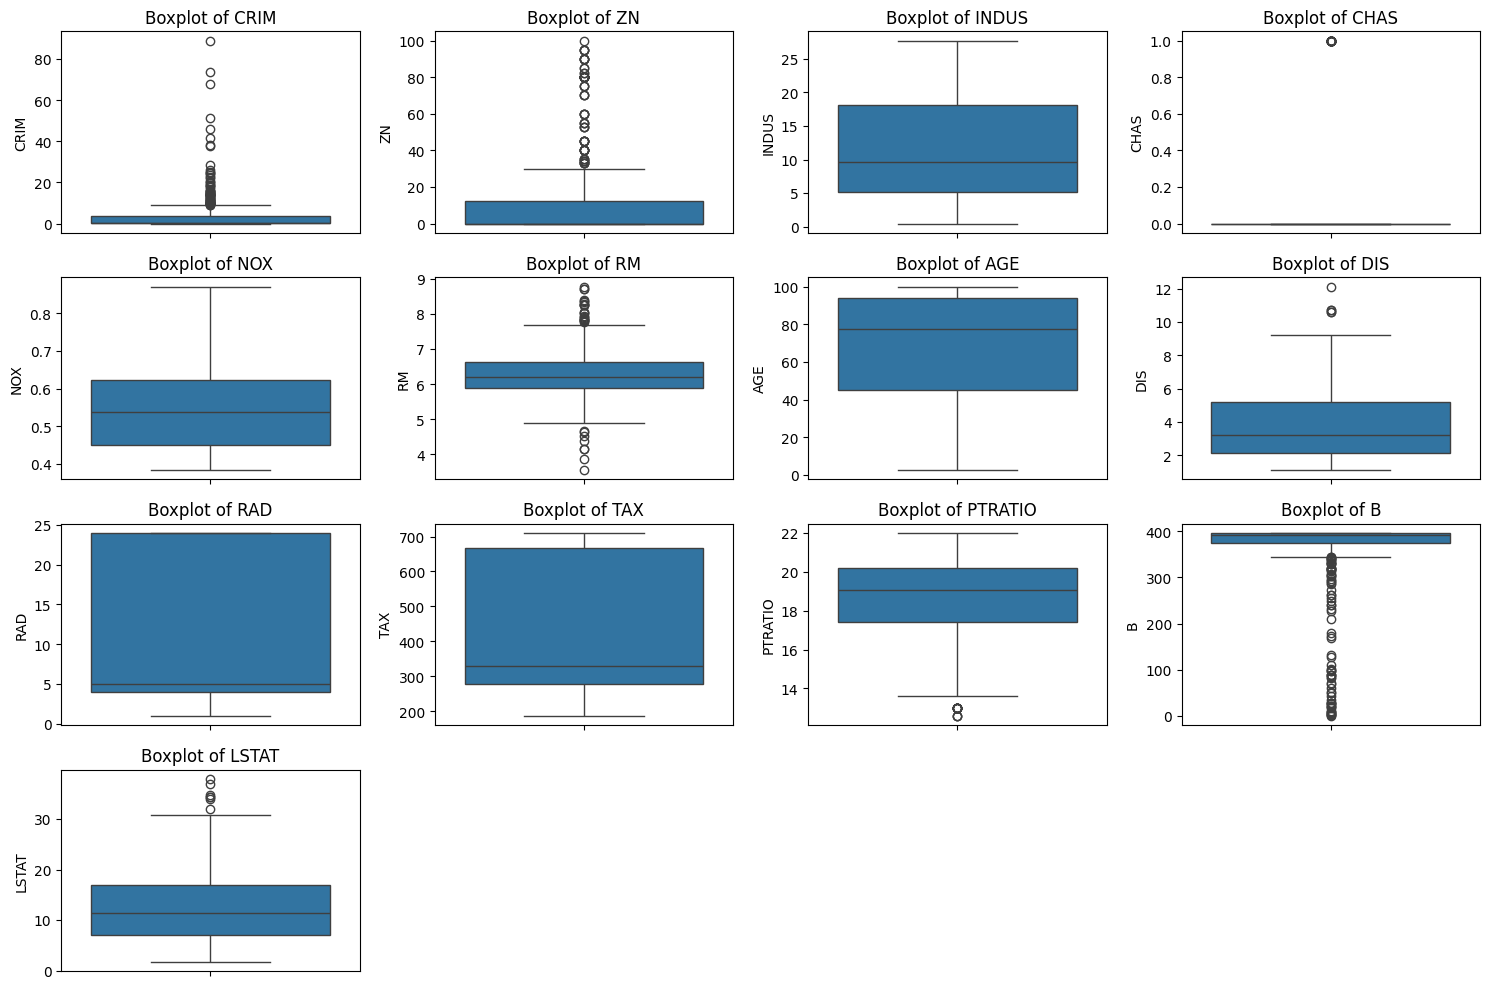

In [108]:
# Visualization Technique Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [109]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


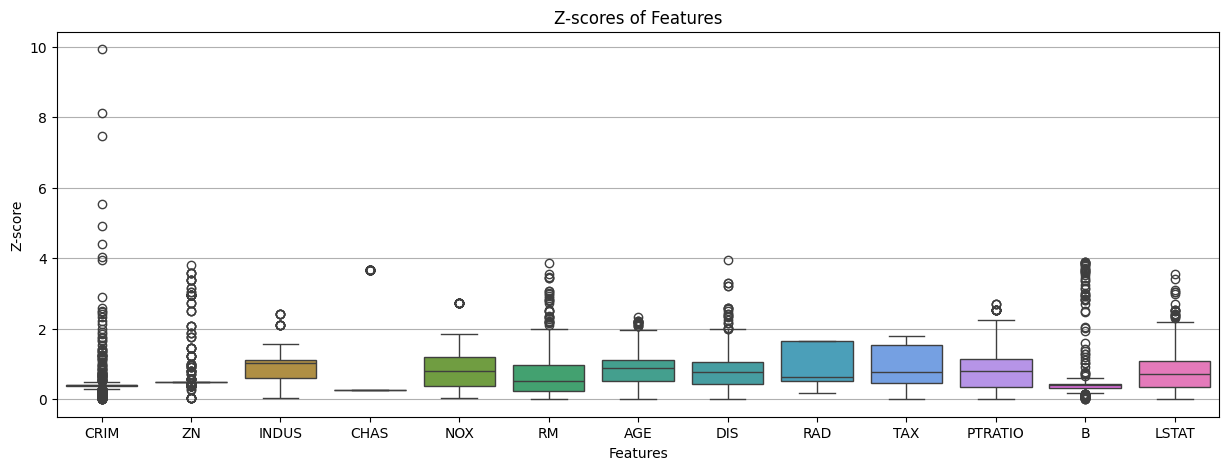

In [110]:
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor

# Add the new outliers calculated columns to the DataFrame
# Univariate Outlier Detection using Z-score
# stats.zscore calculates the Z-scores for one or more columns
# in this case we calculate the Z-scores for all columns
# it will return an array of Z-scores with the same shape as the input or the input columns
# np.abs calculates the absolute value of the Z-scores to make them positive
z_scores = np.abs(stats.zscore(data_df[columns]))

# Plot the Z-scores for each feature(column)
plt.figure(figsize=(15, 5))
sns.boxplot(data=z_scores)
plt.title("Z-scores of Features")
plt.xticks(ticks=np.arange(len(columns)), labels=columns)
plt.xlabel("Features")
plt.ylabel("Z-score")
plt.grid(axis='y')
plt.show()


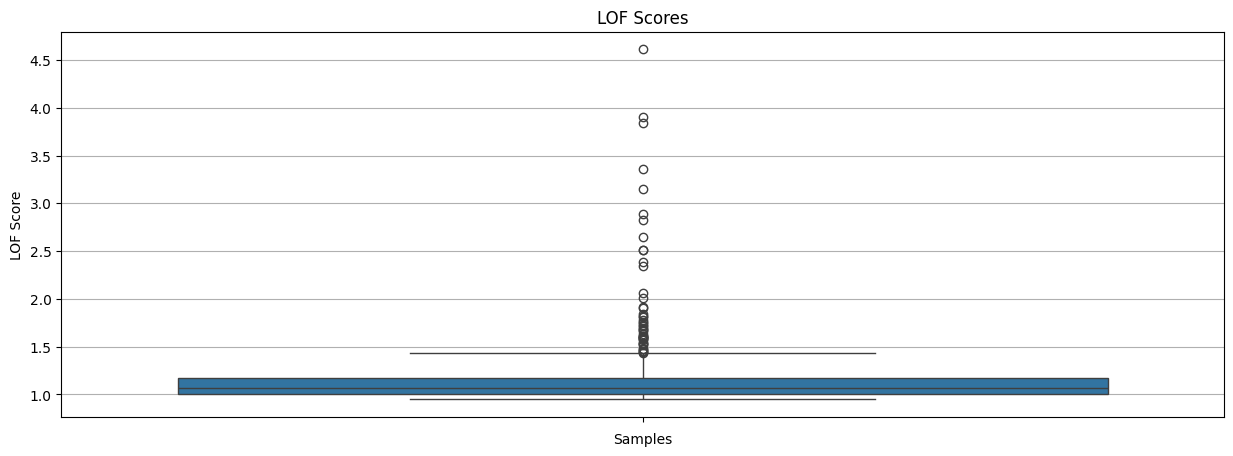

In [111]:

# Multivariate Outlier Detection using KNN (Local Outlier Factor)
#n_neighbors = 20 is the number of neighbors to consider for measuring the local density,
# in other words, if the number of neighbors is low it will be considered as an outlier
# contamination = 0.05 is the proportion of outliers in the dataset
# in other words, 5% of the data will be considered as outliers, this is a hyperparameter
# that can be adjusted based on the dataset, it is usually set between 1% to 10% of the data
# if the value is 1% it means that the model will consider 1% of the data as outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# fit_predict method returns -1 for outliers and 1 for inliers
data_df['LOF_outlier'] = lof.fit_predict(data_df[columns])
# Convert the LOF_outlier column to boolean
data_df['LOF_outlier'] = data_df['LOF_outlier'] == -1

# Plot the LOF scores
plt.figure(figsize=(15, 5))
sns.boxplot(data=lof.negative_outlier_factor_ * -1)
plt.title("LOF Scores")
plt.xlabel("Samples")
plt.ylabel("LOF Score")
plt.grid(axis='y')
plt.show()



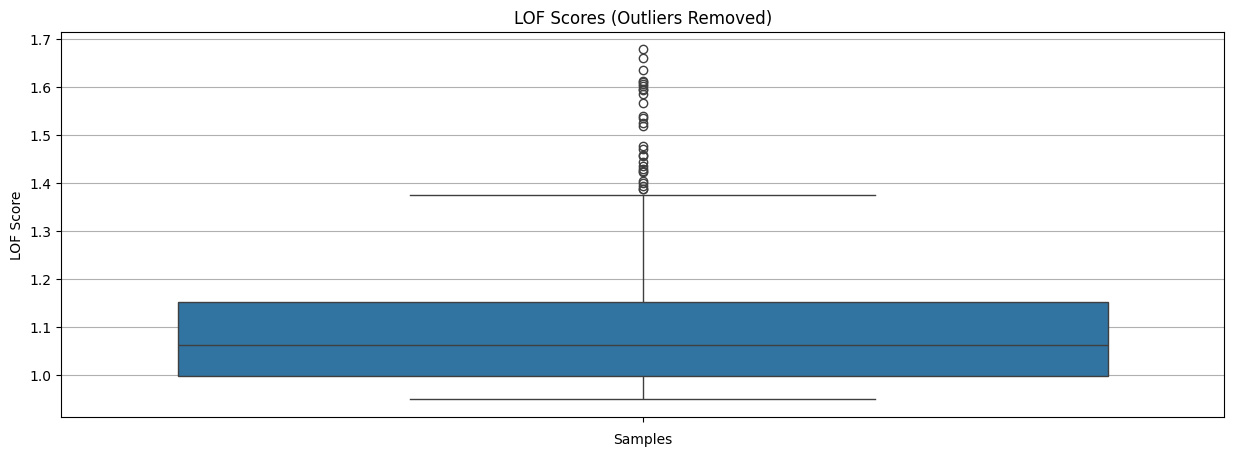

In [112]:
# Remove outliers detected by LOF
data_no_outliers_lof = data_df[~data_df['LOF_outlier']]

# Plot the LOF scores after removing the outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=lof.negative_outlier_factor_[~data_df['LOF_outlier']] * -1)
plt.title("LOF Scores (Outliers Removed)")
plt.xlabel("Samples")
plt.ylabel("LOF Score")
plt.grid(axis='y')
plt.show()